<a href="https://colab.research.google.com/github/donw385/DS-Sprint-01-Dealing-With-Data/blob/master/Don_Wang_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# loading data, with names

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


cols=['age','operation_year','nodes','survival']
patient = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None,names=cols)

In [84]:
patient.dtypes

age               int64
operation_year    int64
nodes             int64
survival          int64
dtype: object

In [0]:
#The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

patient['survival'] = patient['survival'].astype(str)
di = {'1': 1, '2': 0}
patient = patient.replace({'survival': di})

In [86]:
#appropriate number of observations
patient.describe()

,age,operation_year,nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [87]:
#no missing features
patient.isnull().sum()

age               0
operation_year    0
nodes             0
survival          0
dtype: int64

In [88]:
#At the end, print the first five rows of the dataset to demonstrate the above.

patient.head()

,age,operation_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [89]:
# table 1

patient.describe()

,age,operation_year,nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [90]:
# table 2

patient.corr()

,age,operation_year,nodes,survival
age,1.000000,0.089529,-0.063176,-0.067950
operation_year,0.089529,1.000000,-0.003764,0.004768
nodes,-0.063176,-0.003764,1.000000,-0.286768
survival,-0.067950,0.004768,-0.286768,1.000000


In [91]:
# table 3: cross tab

age_bins = pd.cut(patient['age'], 5)
year_bins = pd.cut(patient['operation_year'], 5)
nodes_bins = pd.cut(patient['nodes'], [0, 1, 2, 3,4,5,8,25,100])
age_nodes_survival = pd.crosstab([age_bins, nodes_bins], patient['survival'], normalize = 'index')
age_nodes_survival

survival                         0         1
age            nodes                        
(29.947, 40.6] (0, 1]     0.000000  1.000000
               (1, 2]     0.000000  1.000000
               (2, 3]     0.000000  1.000000
               (3, 4]     0.000000  1.000000
               (4, 5]     0.000000  1.000000
               (5, 8]     0.000000  1.000000
               (8, 25]    0.285714  0.714286
               (25, 100]  0.000000  1.000000
(40.6, 51.2]   (0, 1]     0.133333  0.866667
               (1, 2]     0.285714  0.714286
               (2, 3]     0.333333  0.666667
               (3, 4]     0.000000  1.000000
               (4, 5]     1.000000  0.000000
               (5, 8]     0.333333  0.666667
               (8, 25]    0.666667  0.333333
               (25, 100]  1.000000  0.000000
(51.2, 61.8]   (0, 1]     0.200000  0.800000
               (1, 2]     0.200000  0.800000
               (2, 3]     0.444444  0.555556
               (3, 4]     0.400000  0.600000
               (4, 5]     0.750000  0.250000
               (5, 8]     0.333333  0.666667
               (8, 25]    0.642857  0.357143
               (25, 100]  0.500000  0.500000
(61.8, 72.4]   (0, 1]     0.500000  0.500000
               (1, 2]     0.333333  0.666667
               (2, 3]     0.000000  1.000000
               (3, 4]     1.000000  0.000000
               (4, 5]     0.000000  0.000000
               (5, 8]     0.500000  0.500000
               (8, 25]    0.625000  0.375000
               (25, 100]  0.000000  1.000000
(72.4, 83.0]   (0, 1]     0.500000  0.500000
               (1, 2]     1.000000  0.000000
               (2, 3]     0.500000  0.500000
               (3, 4]     0.000000  0.000000
               (4, 5]     0.000000  0.000000
               (5, 8]     0.000000  0.000000
               (8, 25]    0.000000  0.000000
               (25, 100]  0.000000  0.000000

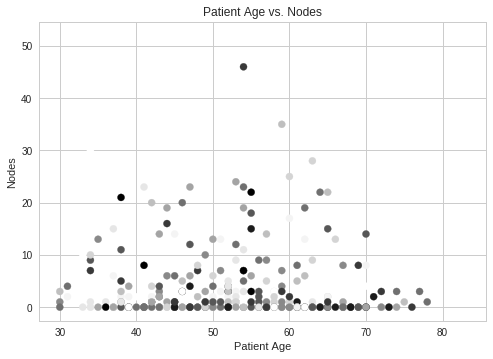

In [92]:
#plot 1

plt.scatter(patient.age, patient.nodes, s=50, c=patient.operation_year)
plt.title('Patient Age vs. Nodes')
plt.xlabel('Patient Age')
plt.ylabel('Nodes')
plt.show()

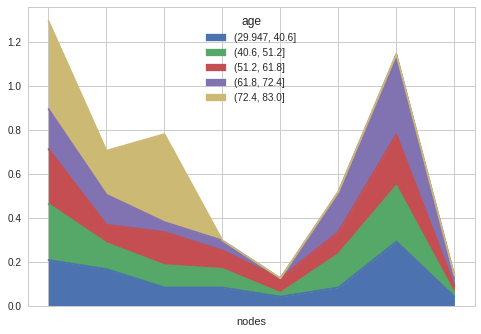

In [93]:
#graph 2

ax=pd.crosstab(nodes_bins, age_bins, normalize='columns')
ax.plot.area()

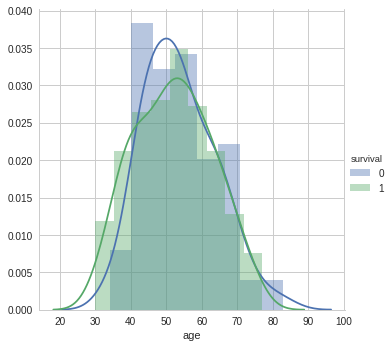

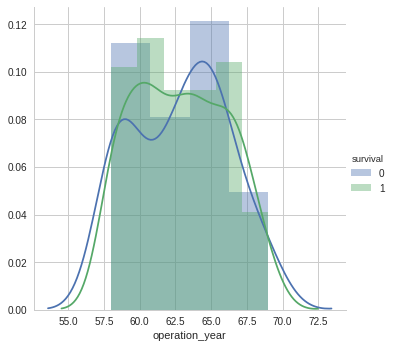

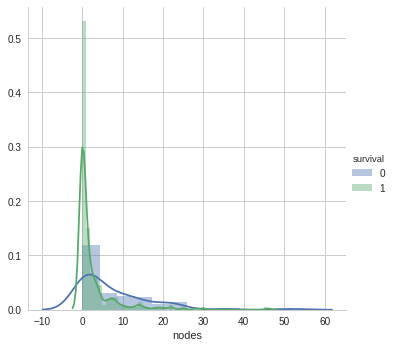

In [94]:
#graph 3-5, height of the bar is percentage of data points under the corresponding group

for idx, feature in enumerate(list(patient.columns)[:-1]):
    fg = sns.FacetGrid(patient, hue='survival', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

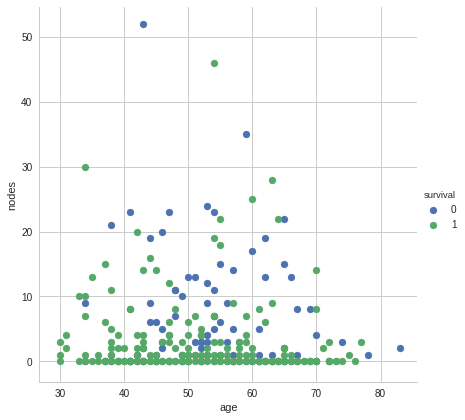

In [95]:
#graph 6

sns.set_style('whitegrid');
sns.FacetGrid(patient, hue='survival', size=6) \
   .map(plt.scatter, 'age', 'nodes') \
   .add_legend();
plt.show();

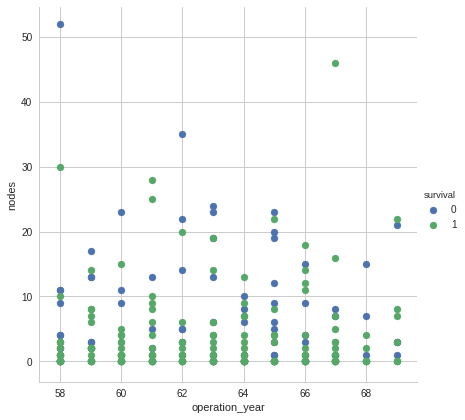

In [96]:
#graph 7

sns.set_style('whitegrid');
sns.FacetGrid(patient, hue='survival', size=6) \
   .map(plt.scatter, 'operation_year', 'nodes') \
   .add_legend();
plt.show();

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
It looks like if you have zero nodes, you seem to more likely to survive, as most of the people who survived have no nodes
- What is at least one feature that looks to have a negative relationship with survival?
For people ages 30 - 50, it seems as if you have more nodes, you are less likely to survive. From graph 4 we can see that the number of people died increased dramatically between 1963 and 1965. From graph 3 people between ages 40 and 45 are the most likely to die, but this by itself isn't necessarily true, as there could be other factors such as nodes.

- How are those two features related with each other, and what might that mean?
Age and nodes could potentially be related, but from graph 7 this doesn't look to be the case. However, the relationships could be contaminated if the propensity for getting nodes was different n eage year of operation, would would muddy the results.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.